Домашнее задание Возьмите задачу с винами https://www.kaggle.com/rajyellow46/wine-quality и решите её, оформив в виде CrispDM-подхода


1. Понимание бизнеса

1.1 Цель

Предсказать оценку вина по десятибальной шкале

1.2 Описание

Три эксперта по дегустации вин (далее именуемые "дегустаторы") попробовали ~ 6500 образцов португальского вина "Винью Верде", ~30% и ~ 70% из которых были красными и белыми вариантами соответственно. Каждый дегустатор оценил КАЧЕСТВО образцов по шкале от 0 до 10 (0 = плохо, 10 = отлично), а официально зарегистрированное качество образца было средним из 3 оценок. Каждый образец вина содержит данные, детализирующие его химические и физические свойства, перечисленные ниже. Единицы измерения для большинства количеств указаны в МАССОВОЙ ПЛОТНОСТИ, в граммах (г) или миллиграммах (мг) на кубический дециметр (дм).

2. Data Understanding

2.1 Import Libraries

In [23]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import  Normalizer , scale
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

2.2 Загрузка данных

In [2]:
data = pd.read_csv('winequalityN.csv')

In [4]:
data.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

Описание переменных:

QUALITY - ОЦЕНКА (целое число в [1 - 10])
FIXED ACIDITY - ФИКСИРОВАННАЯ КИСЛОТНОСТЬ (числовая, г/дм^3)
VOLATILE ACIDITY - ЛЕТУЧАЯ КИСЛОТНОСТЬ (числовая, г/дм^3)
CITRIC ACID - ЛИМОННАЯ КИСЛОТА (числовая, г/дм^3)
RESIDUAL SUGAR - ОСТАТОЧНЫЙ САХАР (числовой, г/дм^3)
CHLORIDES - ХЛОРИДЫ (числовые, г/дм^3)
FREE SULFUR DIOXIDE - СВОБОДНЫЙ ДИОКСИД СЕРЫ (числовой, мг/дм^3)
TOTAL SULFUR DIOXIDE - ОБЩИЙ ДИОКСИД СЕРЫ (числовой, мг/дм^3)
DENSITY - ПЛОТНОСТЬ (числовая, г/дм^3)
pH (числовой, <= 14)
SULPHATES - СУЛЬФАТЫ (числовые, г/дм^3)
ALCOHOL - СПИРТ (числовой, [0,0 - 1,0], % по объему)

2.3.1 Далее взглянем на некоторую ключевую информацию о переменных

In [5]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

Выделяются максимальное и минимальное значения у параметра residual sugar и у параметра free sulfur dioxide. 

2.4.2 Тепловая карта корреляции может дать нам понимание того, какие переменные важны

In [38]:
plt.figure(figsize=[10,10],dpi=2000)
sns.heatmap(data.corr(),cmap='coolwarm',linewidth=2,annot=True,annot_kws={'fontsize':10})

<AxesSubplot:>

Большая корреляция у free sulfur dioxide и total sulfur dioxide. И обратная зависимость между density и alcohol (очень интересно почему?)

2.3.3 Можно посмотреть как оценивалось белое или красное вино

In [39]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

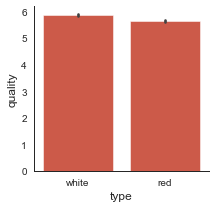

In [40]:
# Plot survival rate by Embarked
plot_categories( data , cat = 'type' , target = 'quality' )

2.3.4 Взаимосвязь между количеством спирта и оценки вина

In [41]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

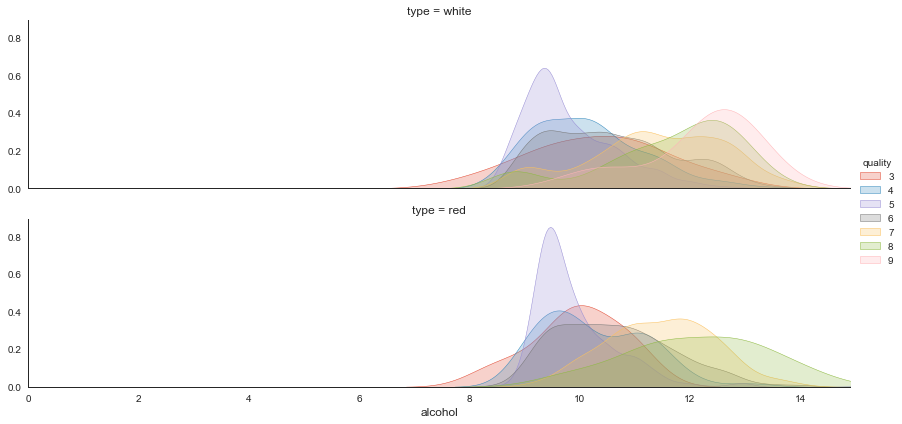

In [42]:
# Plot distributions of Age of passangers who survived or did not survive
plot_distribution( data , var = 'alcohol' , target = 'quality' , row = 'type' )

3. Data Preparation

3.1 Категориальные переменные должны быть преобразованы в числовые переменные
Создадим два новых параметра для белого и красного вин

In [30]:
# Create a new variable for every unique value of type
type_ = pd.get_dummies( df.type , prefix='type' )
df = pd.concat([df,type_],axis=1)
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  type_red  type_white  
0       0.45      8.8        6         0           1  
1       0.49      9.5        6         0           1  
2       0.44     10.1        6         0           1  
3       0.40      9.9        6         0           1  
4       0.40      9.9        6         0           1

3.2 Заполнить пропущенные значения в переменных
Пропущенных значений немного, можно удалить строки с незаполненными данными

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [26]:
df = data.dropna()

3.3 Feature Engineering – добавляем новые признаки
Вместо оценок вин, разобъём их на 3 класса - плохое, среднее и хорошее

In [34]:
df['Quality Class'] = 'mid'
df.loc[df['quality']>=8,'Quality Class'] = 'good'
df.loc[df['quality']<=3,'Quality Class'] = 'bad'

good, bad = df[df['quality']>=8],df[df['quality']<=3]

3.4.2 Создание датасетов
Разобъём данные на тренировочные и тестовые

In [35]:
X,y = df.drop(['type', 'quality', 'Quality Class'],axis=1),df['Quality Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

LogisticRegression(class_weight='balanced')

4. Моделирование
Для моделирования выберем логистическую регрессию

In [ ]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)

5. Оценка
Произведём оценку нашей модели. Видно, что модель обучилась плохо. Нужно дорабатывать эту модель или выбрать другую

In [36]:
print (model.score( X_train , y_train ) , model.score( X_test , y_test ))

0.4415860735009671 0.4895591647331787


6. Развертывание
Загружаем нашу работу на гитхаб и отправляем её на проверку